height has been deprecated.



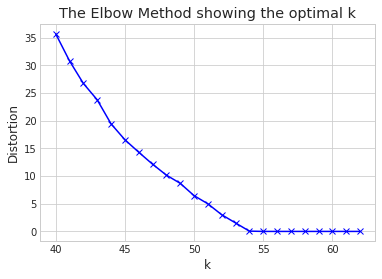

55


In [63]:
# $ 0 u l $ h i f t 3 r

# IMPORTING DATA HANDLING LIBRARIES
import numpy as np
import sys
import pandas as pd
pd.set_option("display.height",2000)
pd.set_option("display.max_rows",2000)
pd.set_option("display.max_columns",2000)
pd.set_option("display.width",2000)
pd.set_option("display.max_colwidth",-1)

import matplotlib
from matplotlib import pyplot as plt
matplotlib.style.use("ggplot")

import seaborn as sns
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings("ignore")


# LOAD DATA

train = pd.read_csv("data/train.csv")
final = pd.DataFrame({"ln":train["ln"],"dob":train["dob"],"gn":train["gn"],"fn":train["fn"]},columns=["fn","ln","dob","gn"])

# CHECK DATA

# print(train)
# print(train.shape)
# print(train.info())
# print(train.describe())

# CHECK NULL FIELDS

# print(train.isnull().sum())

# PREPROCESSING DATA
train["gn"] = train["gn"].map({"M":1,"F":0})
train["gn"] = train["gn"].astype(int)
train["dob"] = train["dob"].apply(lambda x: x.replace("/",""))
train["dob"] = train["dob"].apply(lambda x: x[1:] if x[0] == "0" else x[0:])
train["dob"] = train["dob"].astype(int)
# print(train["dob"].head())

# print(train.info())
# print(train["dob"].head())

#encoding data into groups
def encode(inp):
    j = 0
    data = pd.DataFrame()
    data['index']   = inp
    data['label'] = inp
    data['label'][0] = 0
    for i in range(1,len(data)):
        if(data['index'][i] in data['index'][i-1]):
            data['label'][i] = data['label'][i-1]
        else:
            j += 1
            data['label'][i] = j
    return data['label']

train.sort_values(['fn'],ascending=False,inplace=True)
train.reset_index(inplace=True)
train.drop(['index'],1,inplace=True)
train['fn'] = encode(train['fn'])

train.sort_values(['ln'],ascending=False,inplace=True)
train.reset_index(inplace=True)
train.drop(['index'],1,inplace=True)
train['ln'] = encode(train['ln'])

# print(train.dtypes)
# print(train["fn"].head())
# print(train.head(20))
# print(train.info())

# train = np.array(df[['fn_label','ln_label','val_gn','val_dob']])
# scaler = preprocessing.StandardScaler().fit(train)
# train = scaler.transform(train)
# train[:50]
# MODELLING

# scaling of data
from sklearn import preprocessing
training_data = np.array(train[['fn','ln','gn','dob']])
scaler = preprocessing.StandardScaler().fit(training_data)
training_data = scaler.transform(training_data)

#giving specific weight to some feature but it is not necessary here because all feature have same contribution 
# weight = 500000000    #specify using using trial and error method 
# training_data[:,3] = training_data[:,3]*weight


from sklearn.cluster import KMeans

def optimal_k(X,k_start,k_end):
    distortions = []
    K = range(k_start,k_end)
    for k in K:
        kmn = KMeans(n_clusters=k).fit(X)
        kmn.fit(X)
        distortions.append(sum(np.min(cdist(X, kmn.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]*1000)

    import matplotlib.pyplot as plt
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()
#choose any value of k_start and k_end for getting optimal value of k in this range 
optimal_k(training_data,40,n_cluster-40)

n_cluster = len(train.index)
kmn = KMeans(n_clusters=n_cluster)

kmn.fit(training_data)
target = kmn.predict(training_data)

final["Target"] = target
# print(final)
print(len(final["Target"].unique()))
final.drop_duplicates(subset="Target",inplace=True)
# print(final.head())
# print(final.shape)
# print(final)
final.to_csv("data/final.csv")